<img src="images/1112/1.jpg"/>

In [2]:
import numpy as np

In [18]:
A = np.array([[2,3,-4],[3,2,-3],[1,-2,5]])
b = np.array([7,6,11])

In [19]:
A_inv = np.linalg.inv(A)
result = A_inv @b
result

array([1.78571429, 7.71428571, 4.92857143])

In [20]:
coeffiecient = np.array([25/14,54/5,69/14])
for (i,j) in zip(result,coeffiecient):
    print((i-j) < 0.001)

True
True
True


In [24]:
C = np.array([[2,3,-4,-1], [3,2,-3,4], [1,-2,5,-2] ,[2,-1,5,9]])
D = np.array([7,6,11,23])

In [28]:
C_inv = np.linalg.inv(C)
result = C_inv @D
result

array([1.42857143, 8.73809524, 5.47619048, 0.16666667])

In [30]:
coeff = np.array([1.42857143, 8.73809524, 5.47619048, 0.16666667])
for (i,j) in zip(result,coeffiecient):
    print((i-j) < 0.001)

True
True
True
True


In [34]:
C[0][0]*coeff[0] + C[0][1]*coeff[1] + C[0][2]*coeff[2] + C[0][3]*coeff[3]
list=[]
for i in range(4):
    sum=0
    for j in range(4):
        sum+=C[i][j]*coeff[j]
    list.append(sum)
list

[np.float64(6.999999990000001),
 np.float64(6.000000010000002),
 np.float64(11.00000001),
 np.float64(23.000000049999997)]

In [35]:
import numpy as np

# 2x + 3y = 7
# 4x - 3y = 11
A = np.array([[2., 3.],
              [4., -3.]])
b = np.array([7., 11.])

x, y = np.linalg.solve(A, b)
print(f"교점: (x, y) = ({x}, {y})")

교점: (x, y) = (3.0, 0.3333333333333333)


[직선 교점] (x, y) = (3.0, 0.3333333333333333)


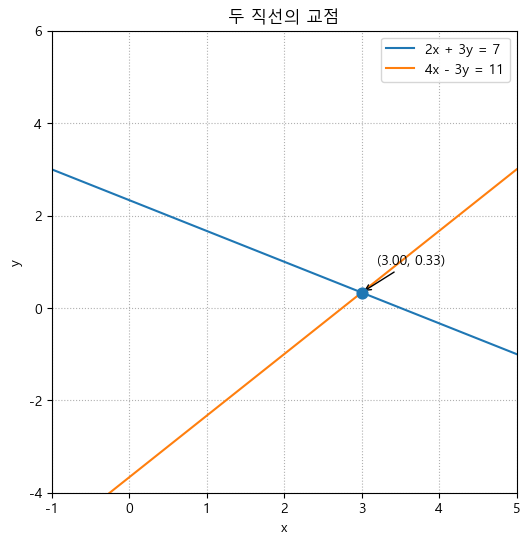

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 2x + 3y = 7
# 4x - 3y = 11
A = np.array([[2., 3.],
              [4., -3.]])
b = np.array([7., 11.])

x, y = np.linalg.solve(A, b)
print(f"[직선 교점] (x, y) = ({x}, {y})")  # (3, 1/3)

# 시각화
y1 = lambda X: (7 - 2*X) / 3.0
y2 = lambda X: (4*X - 11) / 3.0

X = np.linspace(-1, 5, 400)
plt.figure(figsize=(6,6))
plt.plot(X, y1(X), label="2x + 3y = 7")
plt.plot(X, y2(X), label="4x - 3y = 11")
plt.scatter([x], [y], s=60, zorder=5)
plt.annotate(f"({x:.2f}, {y:.2f})", xy=(x,y), xytext=(x+0.2, y+0.6),
             arrowprops=dict(arrowstyle="->"))
plt.xlim(-1, 5); plt.ylim(-4, 6)
plt.xlabel("x"); plt.ylabel("y"); plt.title("두 직선의 교점")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()

[벡터 선형결합 교점] (x, y) = (3.0, 0.3333333333333335)


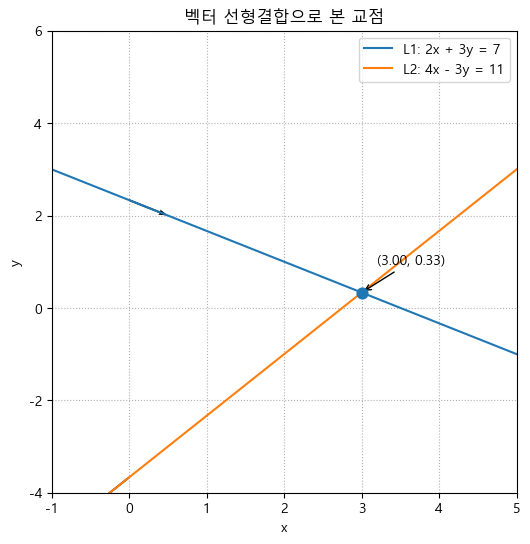

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 직선1: 2x + 3y = 7
#   법선 n1=(2,3) ⟂ 방향 d1 → d1=(3,-2)
#   한 점 p1: x=0 ⇒ y=7/3 ⇒ p1=(0, 7/3)
p1 = np.array([0., 7/3])
d1 = np.array([3., -2.])

# 직선2: 4x - 3y = 11
#   법선 n2=(4,-3) ⟂ 방향 d2 → d2=(-3,-4)
#   한 점 p2: x=0 ⇒ y=-11/3 ⇒ p2=(0, -11/3)
p2 = np.array([0., -11/3])
d2 = np.array([-3., -4.])

# 교점: p1 + t d1 = p2 + s d2
M = np.column_stack((d1, -d2))
rhs = p2 - p1
t, s = np.linalg.solve(M, rhs)
intersection = p1 + t * d1
x, y = intersection
print(f"[벡터 선형결합 교점] (x, y) = ({x}, {y})")  # (3, 1/3)

# 시각화 (두 직선을 파라메트릭으로 그림)
def line_points(p, d, tmin=-5, tmax=5, n=200):
    ts = np.linspace(tmin, tmax, n)
    pts = p.reshape(2,1) + d.reshape(2,1) * ts
    return pts[0], pts[1]

X1, Y1 = line_points(p1, d1)
X2, Y2 = line_points(p2, d2)

plt.figure(figsize=(6,6))
plt.plot(X1, Y1, label="L1: 2x + 3y = 7")
plt.plot(X2, Y2, label="L2: 4x - 3y = 11")
plt.scatter([x], [y], s=60, zorder=5)
plt.annotate(f"({x:.2f}, {y:.2f})", xy=(x,y), xytext=(x+0.2, y+0.6),
             arrowprops=dict(arrowstyle="->"))

# 방향벡터 화살표 (시각적 참고)
scale = 6.0
plt.quiver(p1[0], p1[1], d1[0], d1[1], angles='xy', scale_units='xy', scale=scale, width=0.004)
plt.quiver(p2[0], p2[1], d2[0], d2[1], angles='xy', scale_units='xy', scale=scale, width=0.004)

plt.xlim(-1, 5); plt.ylim(-4, 6)
plt.xlabel("x"); plt.ylabel("y"); plt.title("벡터 선형결합으로 본 교점")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()

[직선 교점] (x, y) = (3.0, 2.0)


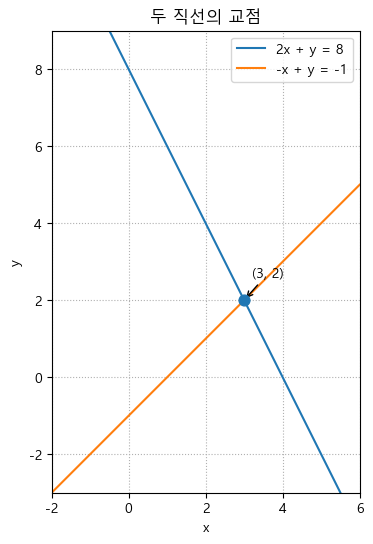

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 새 문제
# 2x + y = 8
# -x + y = -1
A = np.array([[2., 1.],
              [-1., 1.]])
b = np.array([8., -1.])

x, y = np.linalg.solve(A, b)
print(f"[직선 교점] (x, y) = ({x}, {y})")  # (3, 2)

# 시각화
y1 = lambda X: 8 - 2*X
y2 = lambda X: X - 1

X = np.linspace(-2, 6, 400)
plt.figure(figsize=(6,6))
plt.plot(X, y1(X), label="2x + y = 8")
plt.plot(X, y2(X), label="-x + y = -1")
plt.scatter([x], [y], s=60, zorder=5)
plt.annotate(f"({x:.0f}, {y:.0f})", xy=(x,y), xytext=(x+0.2, y+0.6),
             arrowprops=dict(arrowstyle="->"))
plt.xlim(-2, 6); plt.ylim(-3, 9)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x"); plt.ylabel("y"); plt.title("두 직선의 교점")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()

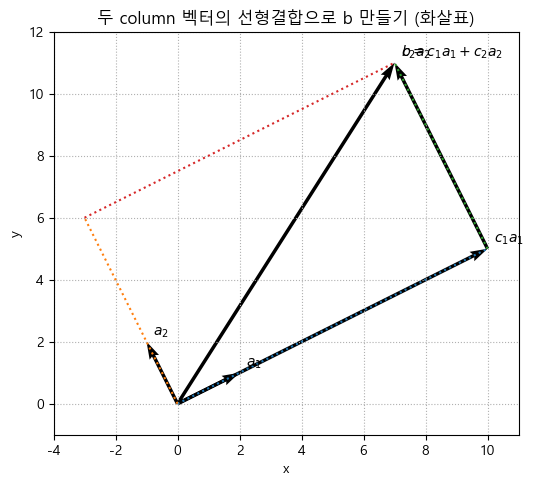

a1 = [2. 1.]
a2 = [-1.  2.]
c1, c2 = 5.0 3.0
b = c1*a1 + c2*a2 = [ 7. 11.]


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# ====== 예시: A의 두 column 벡터 a1, a2 와 계수 c1, c2 ======
a1 = np.array([2., 1.])    # 첫 번째 column 벡터
a2 = np.array([-1., 2.])   # 두 번째 column 벡터
c1, c2 = 5., 3.            # 선형결합 계수  (b = c1*a1 + c2*a2)

# ====== 선형결합 결과 b ======
b = c1*a1 + c2*a2

# ====== 그림 준비 (한 개의 플롯, seaborn 사용 금지) ======
fig, ax = plt.subplots(figsize=(6,6))

# 원점
O = np.zeros(2)

# 1) 원래 column 벡터 a1, a2 (원점에서 출발하는 화살표)
ax.quiver(O[0], O[1], a1[0], a1[1], angles='xy', scale_units='xy', scale=1)
ax.annotate(r"$a_1$", xy=a1, xytext=(a1[0]+0.2, a1[1]+0.2))

ax.quiver(O[0], O[1], a2[0], a2[1], angles='xy', scale_units='xy', scale=1)
ax.annotate(r"$a_2$", xy=a2, xytext=(a2[0]+0.2, a2[1]+0.2))

# 2) 스케일된 벡터 c1*a1, c2*a2 를 head-to-tail로 배치하여 b를 구성
p1 = c1*a1                 # 첫 번째 조각: O -> c1*a1
ax.quiver(O[0], O[1], p1[0], p1[1], angles='xy', scale_units='xy', scale=1)
ax.annotate(r"$c_1 a_1$", xy=p1, xytext=(p1[0]+0.2, p1[1]+0.2))

# 두 번째 조각: (c1*a1) -> (c1*a1 + c2*a2) = b
ax.quiver(p1[0], p1[1], (c2*a2)[0], (c2*a2)[1], angles='xy', scale_units='xy', scale=1)
ax.annotate(r"$c_2 a_2$", xy=(p1 + c2*a2), xytext=(p1[0] + c2*a2[0] + 0.2, p1[1] + c2*a2[1] + 0.2))

# 3) 최종 결과 b (원점에서 바로 그린 화살표)
ax.quiver(O[0], O[1], b[0], b[1], angles='xy', scale_units='xy', scale=1)
ax.annotate(r"$b = c_1 a_1 + c_2 a_2$", xy=b, xytext=(b[0]+0.2, b[1]+0.2))

# 보조: 평행사변형 점선(직선이 아니라 보조선; 원치 않으면 주석 처리)
ax.plot([0, p1[0]], [0, p1[1]], linestyle=":")
ax.plot([0, (c2*a2)[0]], [0, (c2*a2)[1]], linestyle=":")
ax.plot([p1[0], b[0]], [p1[1], b[1]], linestyle=":")
ax.plot([(c2*a2)[0], b[0]], [(c2*a2)[1], b[1]], linestyle=":")

# 보기 좋은 축 범위 자동 설정
xs = [0, a1[0], a2[0], p1[0], (c2*a2)[0], b[0]]
ys = [0, a1[1], a2[1], p1[1], (c2*a2)[1], b[1]]
pad = 1.0
ax.set_xlim(min(xs)-pad, max(xs)+pad)
ax.set_ylim(min(ys)-pad, max(ys)+pad)

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("두 column 벡터의 선형결합으로 b 만들기 (화살표)")

ax.grid(True, linestyle=":")
plt.show()

print("a1 =", a1)
print("a2 =", a2)
print("c1, c2 =", c1, c2)
print("b = c1*a1 + c2*a2 =", b)